# Real Estate Price Analysis - EDA
Exploratory Data Analysis on a real dataset from Emlakjet (Istanbul).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")

df = pd.read_csv("Real Estate in ISTANBUL (Emlakjet).csv")
df = df[["İl", "İlçe", "Mahalle", "Oda_Sayısı", "Brüt_Metrekare", "Binanın_Yaşı",
         "Bulunduğu_Kat", "Banyo_Sayısı", "Fiyatı"]].dropna()
df.columns = ["city", "district", "neighborhood", "number_of_rooms", "area_sqm",
              "building_age", "floor", "number_of_bathrooms", "price"]
df["room_numeric"] = df["number_of_rooms"].str.extract(r"(\d+)").astype(float)
df["number_of_bathrooms"] = pd.to_numeric(df["number_of_bathrooms"], errors="coerce")
df.dropna(inplace=True)

## Descriptive Statistics

In [3]:
df.describe()

,area_sqm,number_of_bathrooms,price,room_numeric
count,2860.000000,2860.000000,2.860000e+03,2860.000000
mean,151.172727,2.051049,4.833481e+06,2.723427
std,87.927417,20.087327,3.709431e+07,1.114035
min,35.000000,1.000000,1.690000e+05,1.000000
25%,100.000000,1.000000,8.687500e+05,2.000000
50%,130.000000,2.000000,1.625000e+06,3.000000
75%,180.000000,2.000000,3.700000e+06,3.000000
max,1100.000000,1075.000000,1.800000e+09,8.000000


## Correlation Matrix

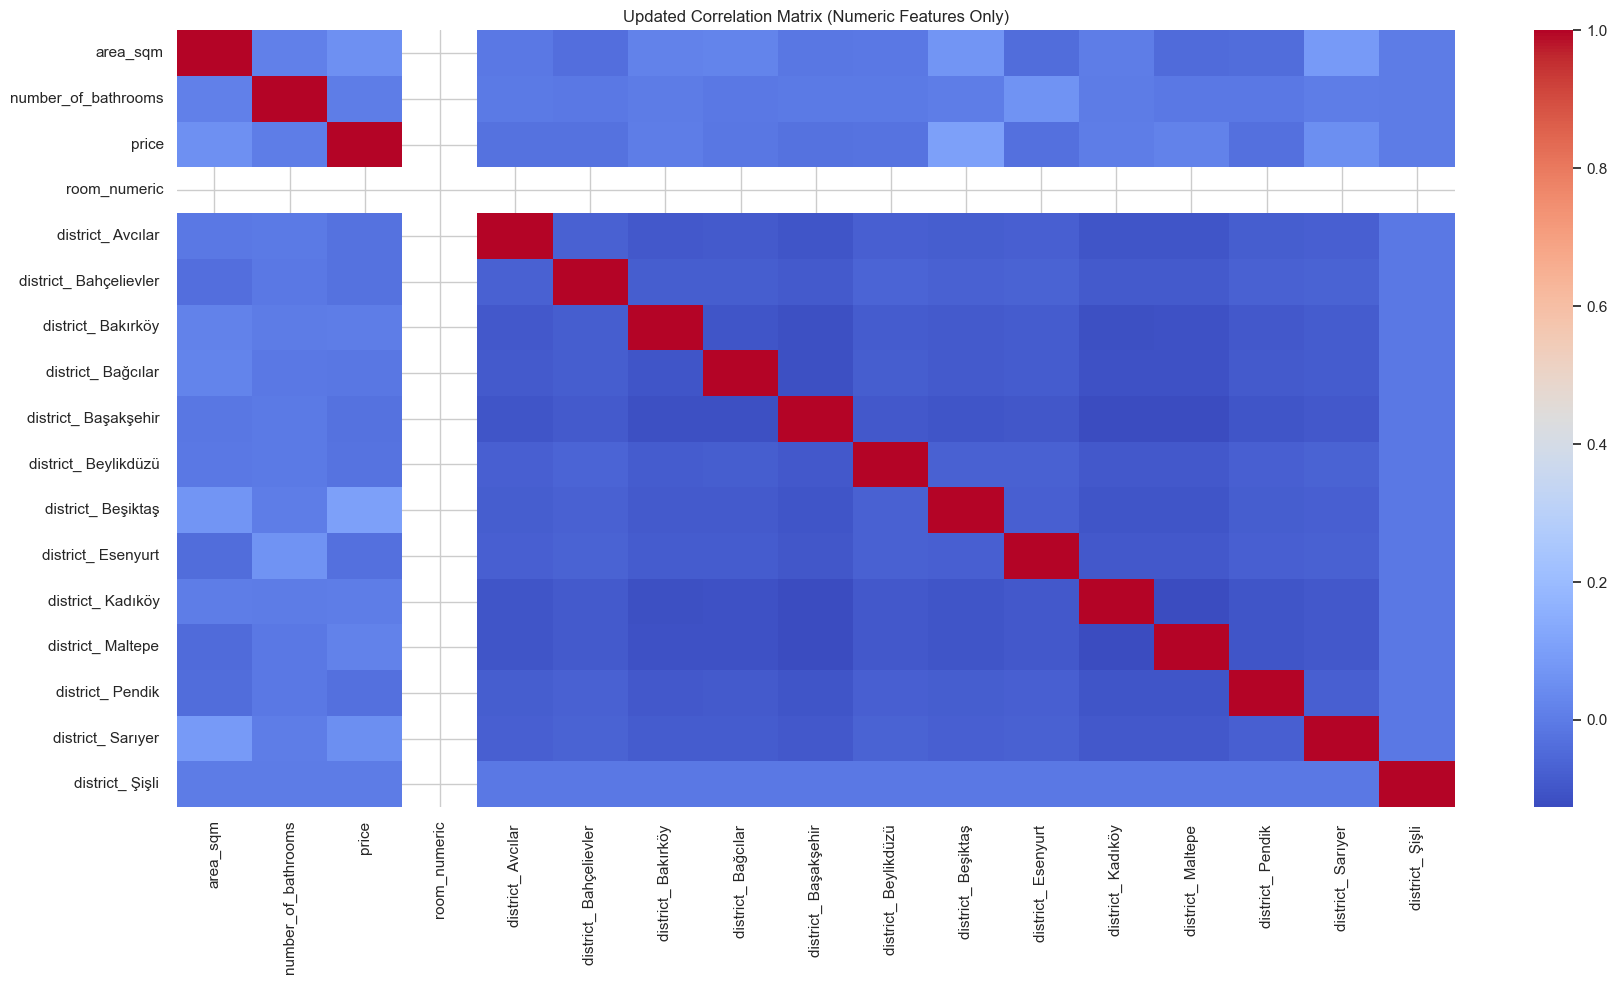

In [22]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Updated Correlation Matrix (Numeric Features Only)")
plt.tight_layout()
plt.show()

## Price Distribution

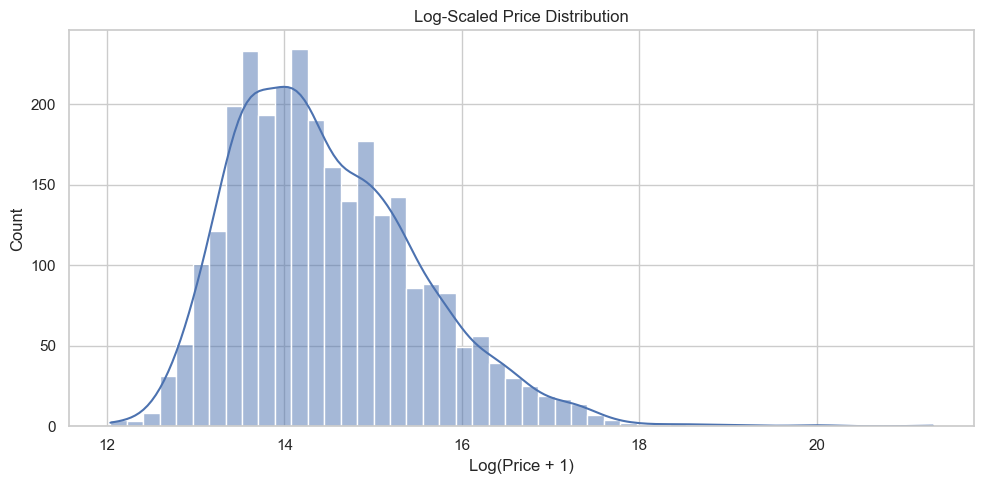

In [5]:
import numpy as np

plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title("Log-Scaled Price Distribution")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Average Price by Number of Rooms

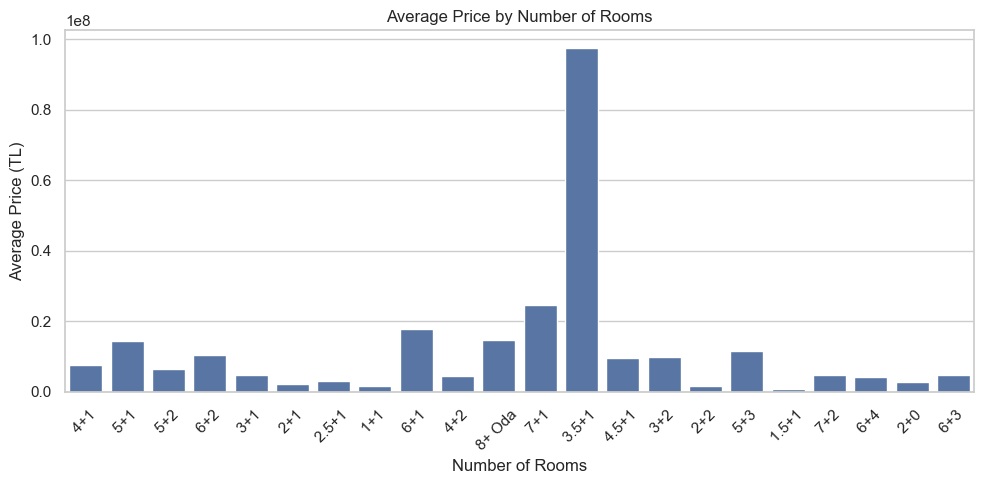

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="number_of_rooms", y="price", estimator=np.mean, errorbar=None)
plt.title("Average Price by Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Average Price (TL)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bonus: Average Price by District

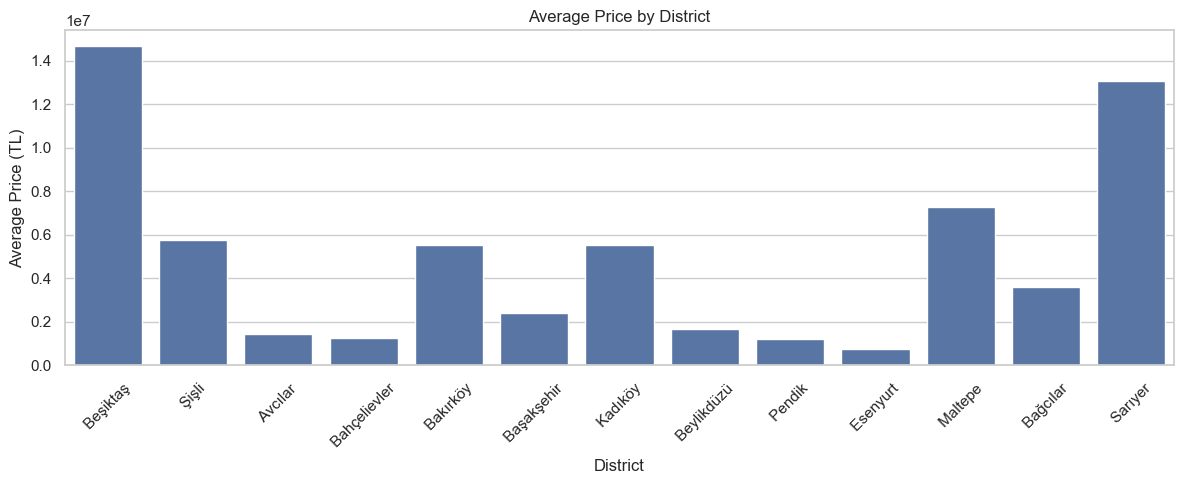

In [7]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x="district", y="price", estimator=np.mean, errorbar=None)
plt.title("Average Price by District")
plt.xlabel("District")
plt.ylabel("Average Price (TL)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bonus: Area vs Price (Scatter Plot)

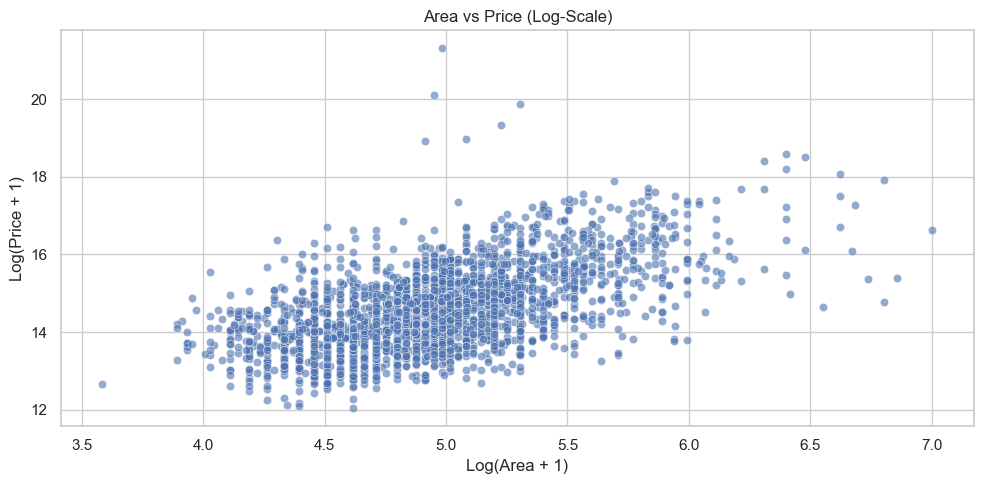

In [8]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=np.log1p(df["area_sqm"]), y=np.log1p(df["price"]), alpha=0.6)
plt.title("Area vs Price (Log-Scale)")
plt.xlabel("Log(Area + 1)")
plt.ylabel("Log(Price + 1)")
plt.tight_layout()
plt.show()

## Bonus: Price by Number of Bathrooms (Boxplot)

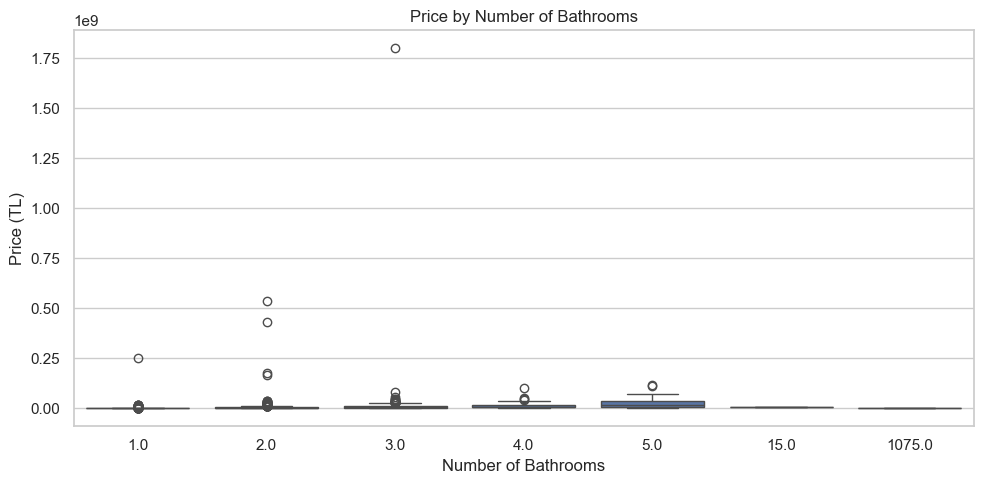

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="number_of_bathrooms", y="price")
plt.title("Price by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price (TL)")
plt.tight_layout()
plt.show()

## Bonus: Building Age Distribution

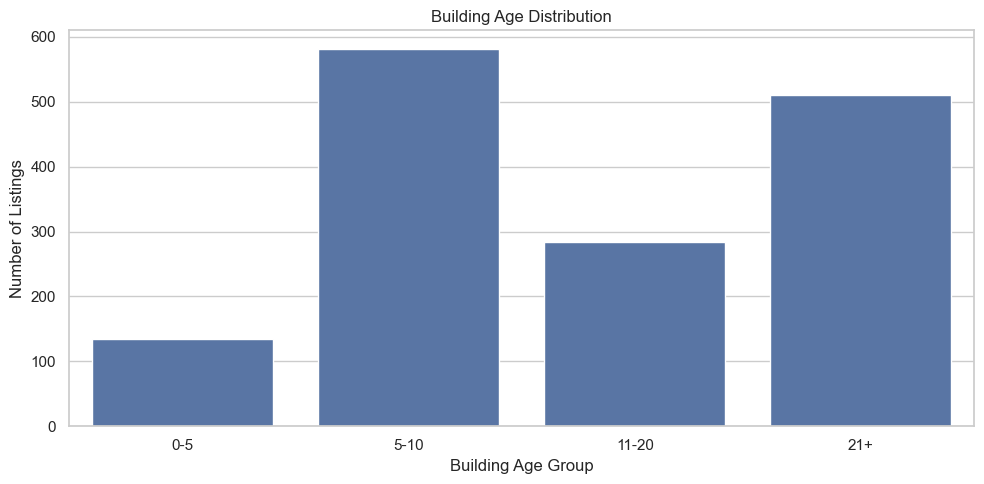

In [10]:
# Clean up inconsistent characters like en-dashes or extra spaces
df["building_age"] = df["building_age"].str.replace("–", "-")  # long dash to normal dash
df["building_age"] = df["building_age"].str.replace(" - ", "-")  # spaced dash to clean
df["building_age"] = df["building_age"].str.strip()  # remove leading/trailing whitespace

# Group building age ranges
df["building_age_grouped"] = df["building_age"].replace({
    "0-1": "0-5",
    "2": "0-5",
    "3-4": "0-5",
    "5-10": "5-10",
    "11-15": "11-20",
    "16-20": "11-20",
    "21 Ve Üzeri": "21+",
    "21 ve üzeri": "21+"
})

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="building_age_grouped", order=["0-5", "5-10", "11-20", "21+"])
plt.title("Building Age Distribution")
plt.xlabel("Building Age Group")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

In [11]:
# Feature transformations: Add price_per_sqm, log_price, and log_area
df["price_per_sqm"] = df["price"] / df["area_sqm"]
df["log_price"] = np.log1p(df["price"])
df["log_area"] = np.log1p(df["area_sqm"])
df[["price", "area_sqm", "price_per_sqm", "log_price", "log_area"]].head()

,price,area_sqm,price_per_sqm,log_price,log_area
0,18000000,190,94736.842105,16.705882,5.252273
1,8500000,300,28333.333333,15.955577,5.707110
2,16500000,350,47142.857143,16.618871,5.860786
3,22000000,450,48888.888889,16.906553,6.111467
4,4250000,160,26562.500000,15.262430,5.081404


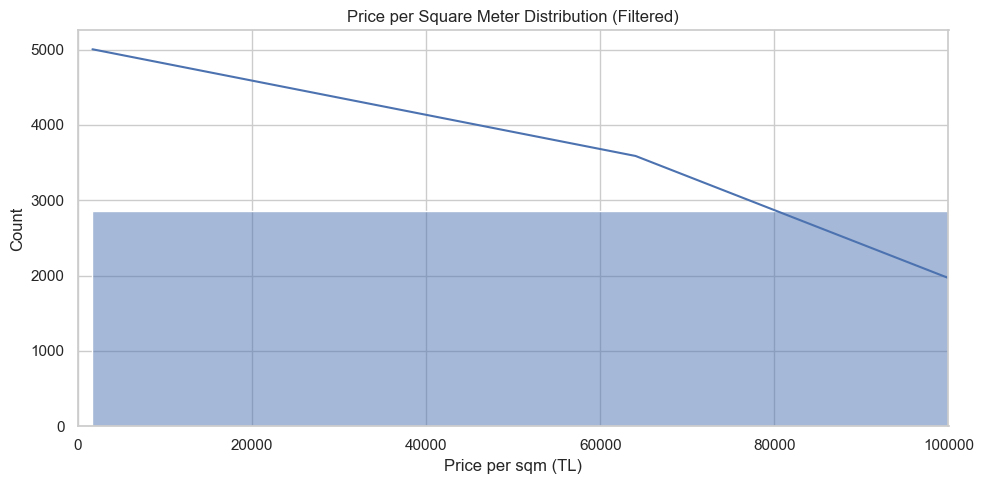

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df["price_per_sqm"], bins=50, kde=True)
plt.xlim(0, 100000)
plt.title("Price per Square Meter Distribution (Filtered)")
plt.xlabel("Price per sqm (TL)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

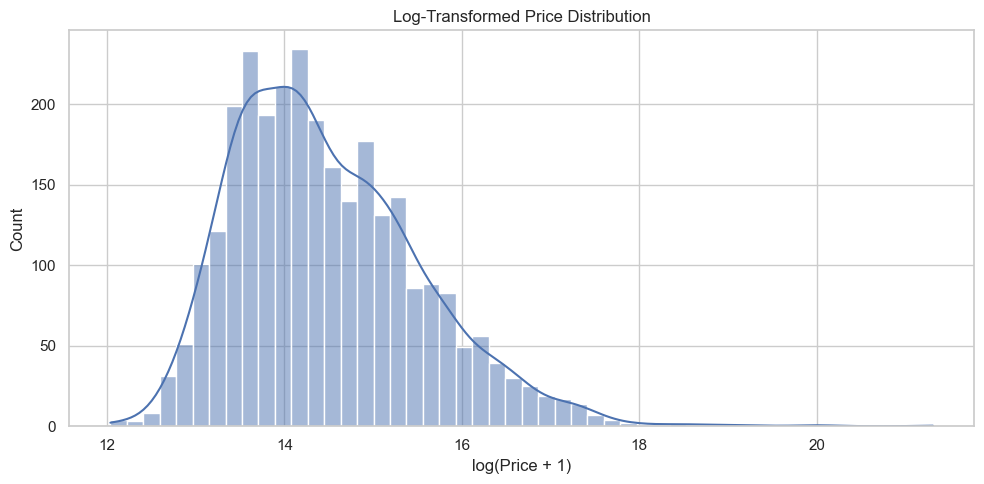

In [14]:
# Histogram for log-transformed price
plt.figure(figsize=(10, 5))
sns.histplot(df["log_price"], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(Price + 1)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

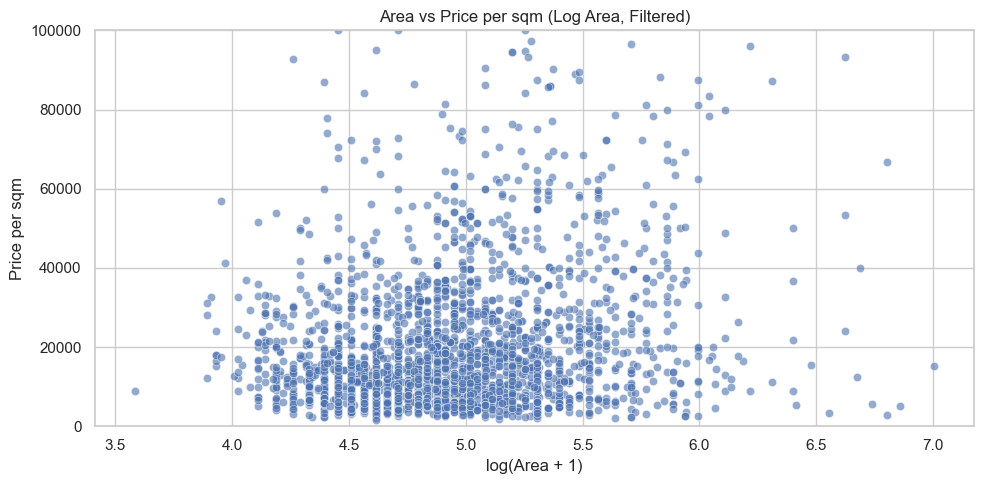

In [16]:
# Scatter plot: log(Area) vs Price per sqm with Y-axis limited
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["log_area"], y=df["price_per_sqm"], alpha=0.6)
plt.ylim(0, 100000)  # Uç değerleri filtrele
plt.title("Area vs Price per sqm (Log Area, Filtered)")
plt.xlabel("log(Area + 1)")
plt.ylabel("Price per sqm")
plt.tight_layout()
plt.show()

In [21]:
df = pd.read_csv("Real Estate in ISTANBUL (Emlakjet).csv")
df = df[["İl", "İlçe", "Mahalle", "Oda_Sayısı", "Brüt_Metrekare", "Binanın_Yaşı",
         "Bulunduğu_Kat", "Banyo_Sayısı", "Fiyatı"]].dropna()
df.columns = ["city", "district", "neighborhood", "number_of_rooms", "area_sqm",
              "building_age", "floor", "number_of_bathrooms", "price"]
df["room_numeric"] = df["number_of_rooms"].str.extract(r"(\\d+)").astype(float)
df["number_of_bathrooms"] = pd.to_numeric(df["number_of_bathrooms"], errors="coerce")
district_dummies = pd.get_dummies(df["district"], prefix="district", dtype=int)
df = pd.concat([df, district_dummies], axis=1)
df.filter(like="district_").head()

,district_ Avcılar,district_ Bahçelievler,district_ Bakırköy,district_ Bağcılar,district_ Başakşehir,district_ Beylikdüzü,district_ Beşiktaş,district_ Esenyurt,district_ Kadıköy,district_ Maltepe,district_ Pendik,district_ Sarıyer,district_ Şişli
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
